---
# [ Project ] 구글 플레이 스토어 데이터를 활용한 데이터 분석

----
####  본 프로젝트는 1) 데이터 읽기 2) 데이터 전처리 3) 데이터 시각화 4) 데이터 분석의 총 4단계로 이루어져 있습니다.
#### ※ 분석의 목적은 다음과 같습니다. 
1) 설치수와 평점 사이에 관계가 있는지를 알아봅니다. <br>
2) 1번의 결과를 유료앱과 무료앱으로 나누어서 분석해봅니다. <br>
3) Category별 점유율을 구하고, 설치수와 평점의 평균을 구해봅니다.

--- 
## 1. 데이터 살펴보기

### ① 데이터 ###
   - 이 프로젝트에서 사용하는 데이터는 구글 플레이 스토어 데이터입니다.
   - https://www.kaggle.com/lava18/google-play-store-apps 에서 공개된 데이터를 사용합니다.
 
 
### ② 환경셋팅 ###
   - 이 프로젝트를 진행하기 위해서는 아래의 라이브러리가 설치되어 있어야합니다. Pandas, matplotlib
   - 개인의 컴퓨터에서 Jupyter Notebook 을 설치하기 힘든 상황이라면, Azure Notebook(https://notebooks.azure.com/) 을 사용하셔도 됩니다.
   
### ③ 필드 ###
- App, Category, Rating, Reviews  
- Size, Installs, Type, Price  
- Content Rating, Genres, Last Updated, Current Ver, Android Ver      


----

## 2. 데이터 읽기

### 해당 챕터의 목표
- csv로 저장되어 있는 데이터를 불러 올 수 있습니다.
- 불러온 데이터의 필드와 데이터수를 확인하는 것으로 추후 분석의 기초를 마련합니다.

제공되는 코드

In [ ]:
import pandas as pd 

### _데이터 읽기 문제_
문제에서 사용할 함수(다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요)  
- read_csv, columns, shape

### [ Quiz 1] pandas의 함수를 사용하여 googleplaystore.csv을 읽어와 data라는 이름의 변수로 저장합니다.

In [ ]:
data = pd.read_csv('googleplaystore.csv')
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### [Quiz 2]data 의 필드명, 필드개수, 데이터 수를 출력합니다. print 함수로 화면에 명시적으로 출력합니다.

In [ ]:
print(data.columns, data.shape[1], data.shape[0])

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object') 13 10841


----
## 3. 데이터 전처리

### **해당 챕터의 목표**
- 가지고 온 데이터의 일부 값이 완전하지 않은 경우가 있습니다. 완전하지 않은 데이터를 사용하면 분석 결과에 오차가 생기거나 분석을 하지 못하는 경우가 발생합니다. 완전하지 않은 값을 수정하거나 해당 데이터를 삭제하는 것으로 추후 분석이 가능한 데이터를 구축합니다.

### _데이터전처리 문제_
#### 문제에서 사용할 함수(다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요)  
- apply, lambda, replace
- 참고 링크 : https://datatofish.com/if-condition-in-pandas-dataframe/

### [Quiz 3] Installs 필드에 'Free'값으로 되어 있는 데이터를 필터(제거)합니다.

In [ ]:
data.loc[data['Installs'] == 'Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
data = data[data.Installs != 'Free']

In [ ]:
data.loc[data['Installs'] == 'Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### [Quiz 4]  Quiz3의 결과를 사용 : Installs 필드의 데이터에서 +와 ,를 제거한 후 숫자 타입으로 치환합니다.
<br> (참고: 1.의 필터 이후(->Quiz3의 처리 이후)의 데이터는 '1,000,000+'와 같이 되어있습니다.)

In [ ]:
def type_change(Installs):
    Installs = Installs.replace('+', '').replace(',', '')
    return int(Installs)

In [ ]:
data['Installs'] = data['Installs'].apply(type_change)
data['Installs']

C:\Users\min\anaconda3\envs\rtx\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10840, dtype: int64

### [Quiz 5] Quiz4의 결과를 사용 : Size 필드에 'Varies with device'값으로 되어 있는 데이터를 필터(제거) 합니다.


In [ ]:
data.loc[data['Size'] == 'Varies with device']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,5000000,Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,10000000,Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,1000000,Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,5000000,Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,100000,Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,100000,Free,0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,1000,Free,0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,100000,Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,5000000,Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device


In [ ]:
data = data[data.Size != 'Varies with device']

In [ ]:
data.loc[data['Size'] == 'Varies with device']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### [Quiz 6] Quiz5의 결과를 사용 : Reviews 데이터를 숫자 타입으로 치환합니다.

In [ ]:
data['Reviews'] = data['Reviews'].apply(type_change)
data['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10835         0
10836        38
10837         4
10838         3
10840    398307
Name: Reviews, Length: 9145, dtype: int64

---
## 4. 데이터 시각화

### **해당 챕터의 목표**
- 전처리가 완료된 데이터를 사용하여 데이터를 시각화합니다.
- Rating과 Installs를 각각 x축과 y축에 매핑하는 것으로 평점과 설치수 사이의 상관관계를 눈으로 확인합니다.
- 유료앱과 무료앱을 나누어 시각화 하는 것으로 유료앱과 무료앱이 가지는 차이를 눈으로 확인합니다.

제공되는 코드

In [ ]:
# data의 경우 데이터 전처리가 완료된 값을 사용해주세요.
import matplotlib.pyplot as plt
import numpy as np
visual_data = data

### _데이터 시각화 문제_
문제에서 사용할 함수(다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요)  
- notnull, log10, scatter(또는 plot), groupby, subplots, get_group

### [Quiz 7]  Installs가 0 초과인  데이터만을 사용합니다. Rating, Intalls에서 값이 Nan인 데이터를 제거합니다.

In [ ]:
visual_data.dropna(subset=['Rating'], axis=0, inplace=True)
visual_data

visual_data.dropna(subset=['Installs'], axis=0, inplace=True)

visual_data

visual_data.isnull().sum()

visual_data = visual_data[data.Installs > 0]
visual_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

### [Quiz 8] X축이 Rating, Y축이 Installs인 점 그래프를 그려봅니다. <br>이 때 Installs의 값이 Rating에 비해 지나치게 크기 때문에 log10을 씌웁니다.

<Figure size 1440x360 with 0 Axes>

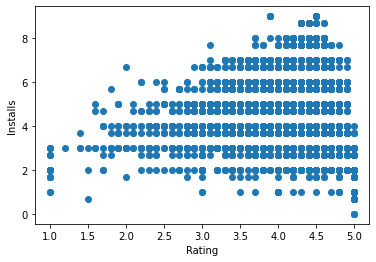

<Figure size 1440x360 with 0 Axes>

In [ ]:
x = data['Rating']
y = np.log10(data['Installs'])
plt.scatter(x, y)
plt.xlabel('Rating')
plt.ylabel('Installs')
plt.figure(figsize=(20, 5))

### [Quiz 9] X축이 Rating, Y축이 Reviews인 점 그래프를 그려봅니다. <br> 이 때, Reviews의 값에 log10을 씌우고, Type으로 GroupBy 하여 Type의 값이 'Free'인 경우는 'red', 'Paid'인 경우는 'green' 으로 표시합니다.

In [ ]:
import seaborn as sns

In [ ]:
visual_data['log_reviews'] = np.log10(visual_data['Reviews'])

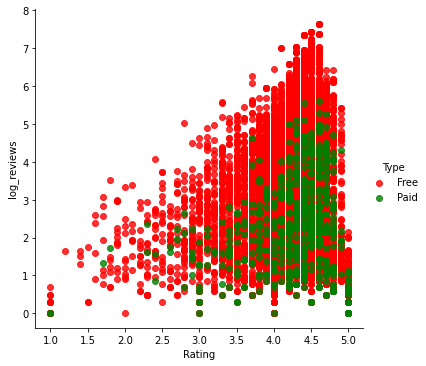

In [ ]:
sns.lmplot(x='Rating', y='log_reviews', data = visual_data , fit_reg = False, hue='Type',
          palette={'Free' : 'red', 'Paid' : 'green'})

---
## 5. 데이터 분석

### **해당 챕터의 목표**
- 시각화의 결과로 얻어진 insight를 기반으로 하여 데이터의 수치적인 부분의 토대를 마련합니다.
- 데이터의 평균, 중앙값, 최대값, 최소값 등 수치적인 데이터를 구해봅니다.

제공되는 코드

In [ ]:
# data의 경우 데이터 전처리가 완료된 값을 사용해주세요.
analysis_data = data

### _데이터 분석 문제_
문제에서 사용할 함수(다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요)  
- notnull, value_counts, pie, show, round, mean, groupby, get_group
- 모든 정답은 소수점 2자리까지 출력합니다. 단, 2번 문제의 경우 autopct='%1.2f%%' 파라미터 사용, 그 외는 round 함수 사용 

### [Quiz 10] Rating, Intalls가 Nan인 데이터는 제거합니다.

In [ ]:
analysis_data.dropna(subset=['Rating'], axis=0, inplace=True)
analysis_data

analysis_data.dropna(subset=['Installs'], axis=0, inplace=True)

analysis_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,1000,Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


### [Quiz 11] Category별 구글 플레이 스토어 점유율을 파이 그래프로 그려봅니다. 

In [ ]:
analysis_data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [ ]:
Categories = (analysis_data['Category'].value_counts()) / analysis_data['Category'].value_counts().sum() * 100
Categories

FAMILY                 20.921206
GAME                   12.601889
TOOLS                   8.202872
MEDICAL                 4.192004
PERSONALIZATION         3.622720
LIFESTYLE               3.622720
FINANCE                 3.441584
SPORTS                  3.195756
BUSINESS                3.182818
PHOTOGRAPHY             3.053435
PRODUCTIVITY            3.040497
HEALTH_AND_FITNESS      2.885237
COMMUNICATION           2.729978
SHOPPING                2.315953
SOCIAL                  2.290076
DATING                  2.238323
NEWS_AND_MAGAZINES      2.186570
TRAVEL_AND_LOCAL        2.070126
BOOKS_AND_REFERENCE     1.863113
VIDEO_PLAYERS           1.500841
EDUCATION               1.423211
MAPS_AND_NAVIGATION     1.229137
ENTERTAINMENT           1.164446
FOOD_AND_DRINK          1.086816
AUTO_AND_VEHICLES       0.815112
LIBRARIES_AND_DEMO      0.802174
ART_AND_DESIGN          0.763359
HOUSE_AND_HOME          0.724544
WEATHER                 0.659853
COMICS                  0.633976
PARENTING 

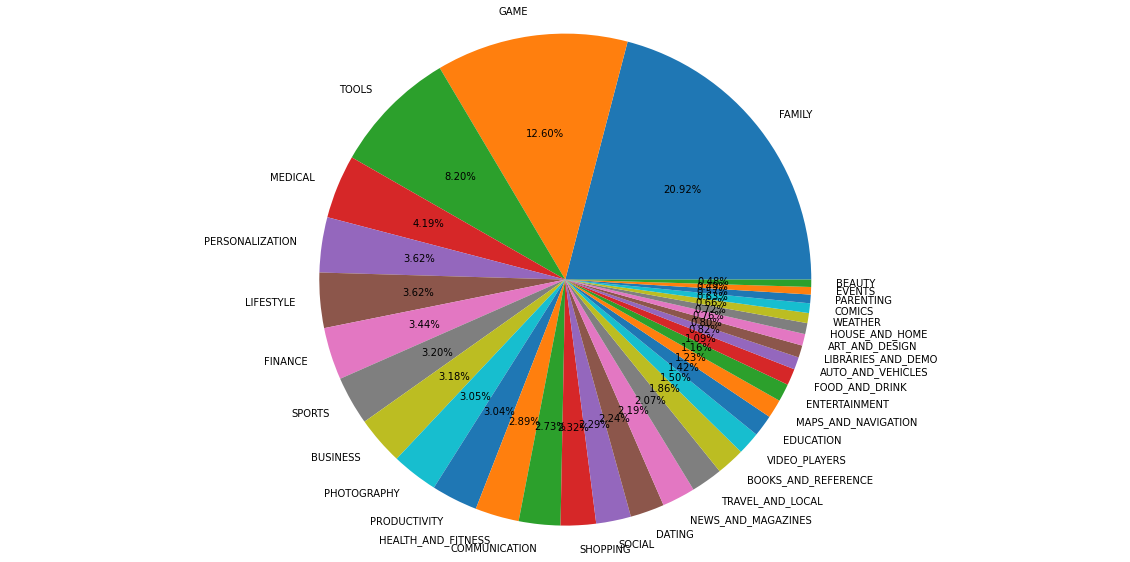

In [ ]:
ax = plt.subplots(figsize=(20, 10))
Categories.plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.axis('equal')
plt.show()

### [Quiz 12] 점유율 상위 5개의 카테고리를 구하고, 각각의 Rating 평균, Installs 평균을 구해봅니다.



In [ ]:
top5 = Categories[:5].index.values
top5

array(['FAMILY', 'GAME', 'TOOLS', 'MEDICAL', 'PERSONALIZATION'],
      dtype=object)

In [ ]:
top5_cat = analysis_data['Category'].isin(top5)
top5_cat

top5_cat_only = analysis_data[top5_cat]
top5_cat_only

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1654,Subway Surfers,GAME,4.5,27722264,76M,1000000000,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1655,Candy Crush Saga,GAME,4.4,22426677,74M,500000000,Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1656,Solitaire,GAME,4.7,254258,23M,10000000,Free,0,Everyone,Card,"August 1, 2018",2.137.0,4.1 and up
1657,Bubble Shooter,GAME,4.5,148897,46M,10000000,Free,0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8.6M,1000,Free,0,Teen,Education,"June 27, 2018",3.8.0,4.1 and up
10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13M,5000,Free,0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up


In [ ]:
round(top5_cat_only.groupby('Category')[['Rating', 'Installs']].mean(), 2)

,Rating,Installs
Category,,
FAMILY,4.19,4204349.77
GAME,4.27,30671922.71
MEDICAL,4.18,143497.15
PERSONALIZATION,4.32,3564796.18
TOOLS,4.01,5561598.58


---
>- 리뷰
   - 잘해주셨습니다.
   - 참고로 위의 데이터를 보면 점유율 5위의 경우 동일한 비유을 가진 카테고리명이 두개가 있습니다.
   - 이런 경우에는 두 개 모두 포함해 표현해주시는 것이 좋습니다.
   - 참고만 해주세요

### [Quiz 13] 점유율 상위 5개의 카테고리중 Rating 평균이 가장 높은 Category를 구하고 해당 Category 데이터를 Type별로 GroupBy한 후 Rating, Installs 평균을 구해봅니다.


In [ ]:
top1 = top5_cat_only.groupby('Category')['Rating'].mean().sort_values().index[-1]
top1

'PERSONALIZATION'

In [ ]:
PERSONALIZATION = analysis_data[data['Category'] == top1]
round(PERSONALIZATION.groupby('Type')[['Rating', 'Installs']].mean(), 2)

,Rating,Installs
Type,,
Free,4.29,4597659.31
Paid,4.43,78883.12
